In [1]:
# Adds SIFT and SURF functionalities.
import sys
sys.path.append("/usr/local/lib/python3.7/site-packages/")

In [2]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as lin

In [3]:
import utils        # Utility to measure code execution
                    # and plot confusion matrices.
import vocabulary   # Read images and produce visual vocabulary.
import classifiers  # Implements different classifiers.

In [4]:
# Reload modules without reloading the kernel.
import importlib
importlib.reload(utils)

<module 'utils' from '/home/wwilson/DSSC/second_year/first_semester/CVPR/CVPR_exam/utils.py'>

---

# Main

## Sift detector

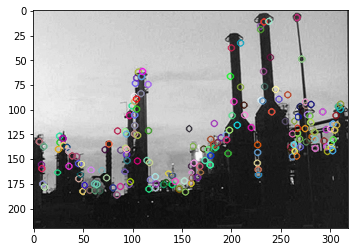

In [5]:
img = cv2.imread("./dataset/train/Industrial/image_0151.jpg")
orb = cv2.xfeatures2d.SIFT_create()
kp = orb.detect(img,None)
kp, des = orb.compute(img, kp)
img2 = cv2.drawKeypoints(img,kp,img)
_ = plt.imshow(img2),plt.show()

### 1. and 2.: reading images, computing visual words and histograms

In [6]:
train_path = "./dataset/train"
test_path = "./dataset/test"

n_clusters = 50 # Size of dictionary.
n_descriptors = 100000

In [7]:
with utils.codeTimer("Build train set"):
    
    # Read images and compute descriptors, saving them in a dataframe.
    train_df = vocabulary.compute_descriptors(train_path)
    
    print("Total number of {}-dimensional descriptors: {}"
          .format(len(train_df['descriptor'][0]), len(train_df)))

    # Compute kmeans clustering using descriptors to obtain visual dictionary.

    # Note: cluster centers are stored in this object,
    # and can be obtained using `kmeans.cluster_centers_`.
    kmeans = vocabulary.k_means_words(train_df, n_clusters, n_descriptors)
    
    # Aggregate descriptor info, making dataframe more compact.
    # Now the third column contains the list of descriptors.
    train_df = train_df.groupby(['image_id', 'label'],
                                as_index = False).agg({'descriptor':
                                                       (lambda x: list(x))})

    # Compute histograms and add them to dataframe.
    train_histograms = vocabulary.compute_histogram(train_df, kmeans)
    train_df['histogram'] = train_histograms

Total number of 128-dimensional descriptors: 762342
Number of sampled descriptors: 100000
Clustered the descriptors in 50 clusters
Executed 'Build train set'.  Elapsed time: 555.869910s


In [8]:
# Perform analogous operations to compute histograms for test set,
# using words extracted from train.

with utils.codeTimer("Build test set"):

    test_df = vocabulary.compute_descriptors(test_path)

    test_df = test_df.groupby(['image_id', 'label'],
                                as_index = False).agg({'descriptor':
                                                       (lambda x: list(x))})

    # Note, kmeans has not been recomputed, the training one is used.
    test_histograms = vocabulary.compute_histogram(test_df, kmeans)
    test_df['histogram'] = test_histograms

Executed 'Build test set'.  Elapsed time: 823.121854s


----
## 3.: Nearest Neighbor classifier

In [ ]:
with codeTimer("NN classifier"):
    true, predicted = nn_classifier(train_df, test_df)
    
# Adding predicted lables to dataframe.
test_df["predicted"] = predicted

Accuracy: 0.3311131956883054


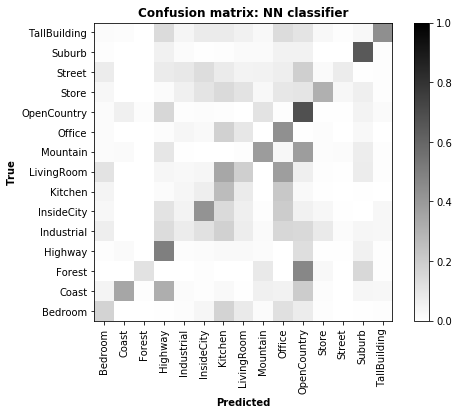

In [349]:
utils.plot_confusion_matrix(true, predicted,
                            title = "Confusion matrix: NN classifier")

----
## 4. and 5.: linear SVM

In [9]:
with utils.codeTimer("Linear SVM classifier"):
    true, predicted = classifiers.linear_SVM_classifier(train_df, test_df)
    
# Adding predicted lables to dataframe.
test_df["predicted"] = predicted

Executed 'Linear SVM classifier'.  Elapsed time: 31.662471s


Accuracy: 0.32203501646331895


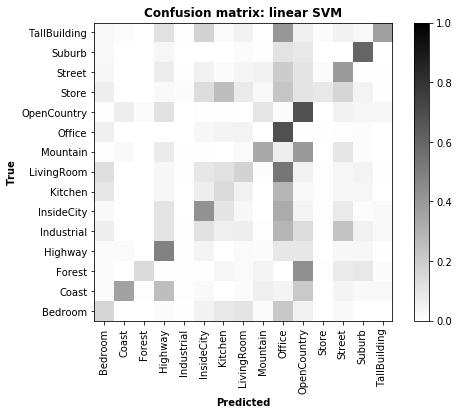

In [10]:
utils.plot_confusion_matrix(true, predicted,
                            title = "Confusion matrix: linear SVM")

----

## 6.: Gaussian SVM

In [11]:
with utils.codeTimer("Gaussian SVM classifier"):
    true, predicted = classifiers.gaussian_SVM_classifier(train_df, test_df)
    
# Adding predicted lables to dataframe.
test_df["predicted"] = predicted

Executed 'Gaussian SVM classifier'.  Elapsed time: 583.478393s


Accuracy: 0.448815045249756


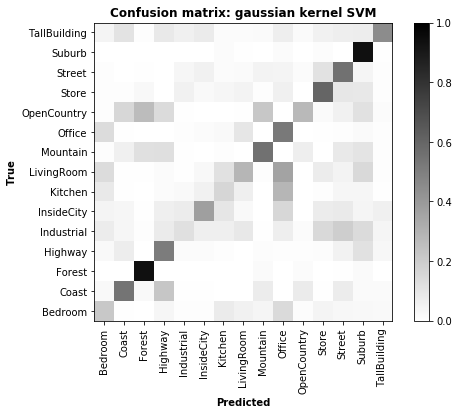

In [12]:
utils.plot_confusion_matrix(true, predicted,
                            title = "Confusion matrix: gaussian kernel SVM")

----